In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn._config import set_config
set_config(print_changed_only=False)

In [2]:
import pandas as pd

df = pd.read_csv('./boston_train.csv')
df.rename(columns = {'medv' : 'PRICE'}, inplace = True)

target_y = df['PRICE']
data_X = df.drop(['PRICE'], axis=1, inplace=False)

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, data_X, target_y, scoring="neg_mean_squared_error", cv=5)

rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -9.34 -11.53 -15.6  -53.42 -35.97]
 5 교차 검증의 개별 RMSE scores :  [3.06 3.39 3.95 7.31 6.  ]
 5 교차 검증의 평균 RMSE : 4.742 


In [4]:
def get_model_cv_prediction(model, data_X, target_y):
    neg_mse_scores = cross_val_score(model, data_X, target_y, scoring="neg_mean_squared_error", cv=5)
    
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
# lgb_reg = LGBMRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, data_X, target_y)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 6.563 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.742 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 5.214 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 5.696 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 5.164 


<Axes: xlabel='None', ylabel='None'>

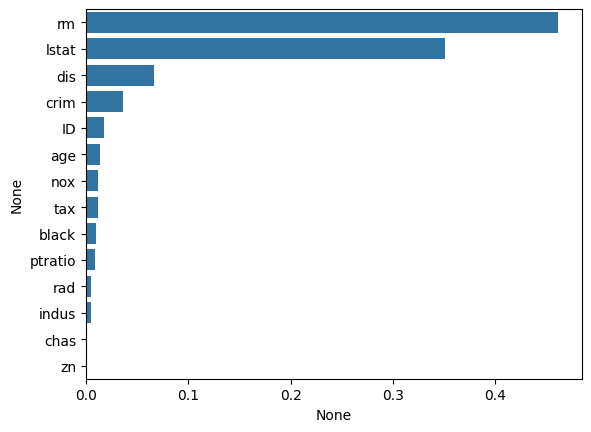

In [6]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(data_X, target_y)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=data_X.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


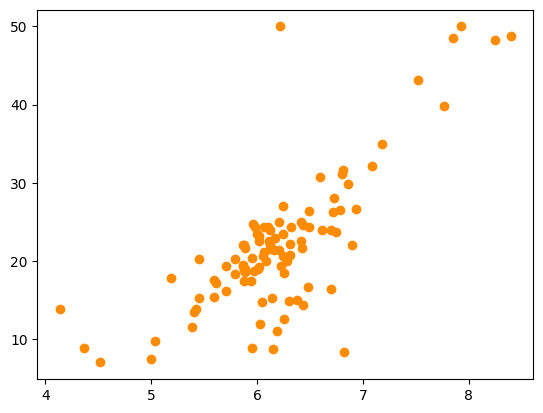

In [7]:
import matplotlib.pyplot as plt

bostonDF_sample = df[['rm','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)

print(bostonDF_sample.shape)

plt.figure()
plt.scatter(bostonDF_sample.rm , bostonDF_sample.PRICE,c="darkorange")

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

test_X = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

feature_X = bostonDF_sample['rm'].values.reshape(-1,1)
target_y = bostonDF_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(feature_X, target_y)
rf_reg2.fit(feature_X, target_y)
rf_reg7.fit(feature_X, target_y)

pred_lr = lr_reg.predict(test_X)
pred_rf2 = rf_reg2.predict(test_X)
pred_rf7 = rf_reg7.predict(test_X)

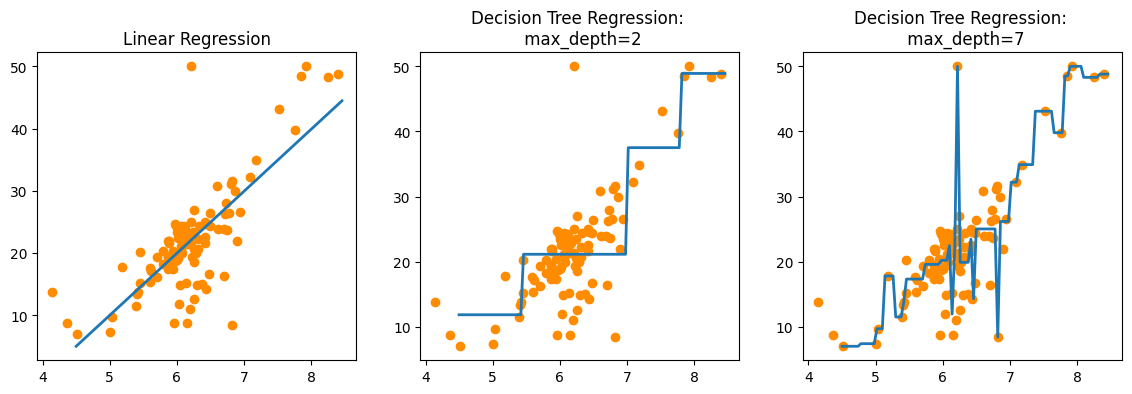

In [9]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.rm, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(test_X, pred_lr, label="linear", linewidth=2)

ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.rm, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(test_X, pred_rf2, label="max_depth:3", linewidth=2)

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.rm, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(test_X, pred_rf7, label="max_depth:7", linewidth=2)